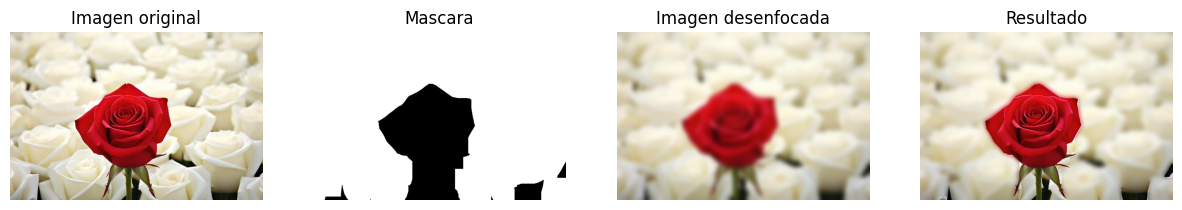

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread(r'rosa.png')

imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

_, umbralbi = cv2.threshold(imagen_gray, 150, 255, cv2.THRESH_BINARY)

mascara = np.zeros_like(a, dtype=np.uint8)

contornos, _ = cv2.findContours(a, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(mascara, contornos, -1, (255, 255, 255), -1)

kernel = np.ones((30, 30), np.uint8)
mascara = cv2.erode(mascara, kernel, iterations=2)
mascara = cv2.dilate(mascara, kernel, iterations=2)

blurred_img = cv2.GaussianBlur(imagen, (57, 57), 0)

img_Final = np.copy(imagen)
img_Final[mascara != 0] = blurred_img[mascara != 0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(mascara, cmap="gray")
plt.title('Mascara')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title('Imagen desenfocada')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(img_Final, cv2.COLOR_BGR2RGB))
plt.title('Resultado')
plt.axis('off')

plt.show()







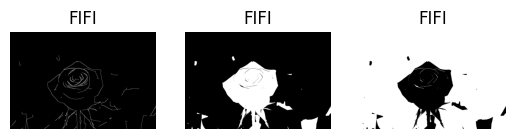

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Read the original image
img = cv2.imread(r'rosa.png')
 

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) 
 

edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) 
_, umbral_inc_bi = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV) 
_, a = cv2.threshold(umbral_inc_bi, 127, 255, cv2.THRESH_BINARY_INV) 



plt.subplot(131)
plt.title('FIFI')
plt.imshow(edges ,cmap='gray')
plt.axis('off')
    
plt.subplot(132)
plt.title('FIFI')
plt.imshow(umbral_inc_bi ,cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('FIFI')
plt.imshow(a ,cmap='gray')
plt.axis('off')

plt.show()


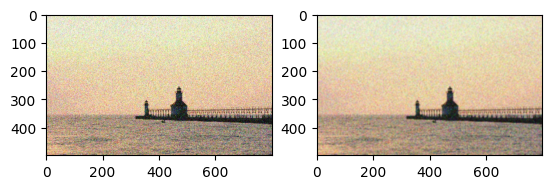

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img = cv2.imread(r"ruido.jpg")
mascara = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]]) / 25
img_fin = cv2.filter2D(img, -1, mascara)
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_fin, cv2.COLOR_BGR2RGB))
plt.show()


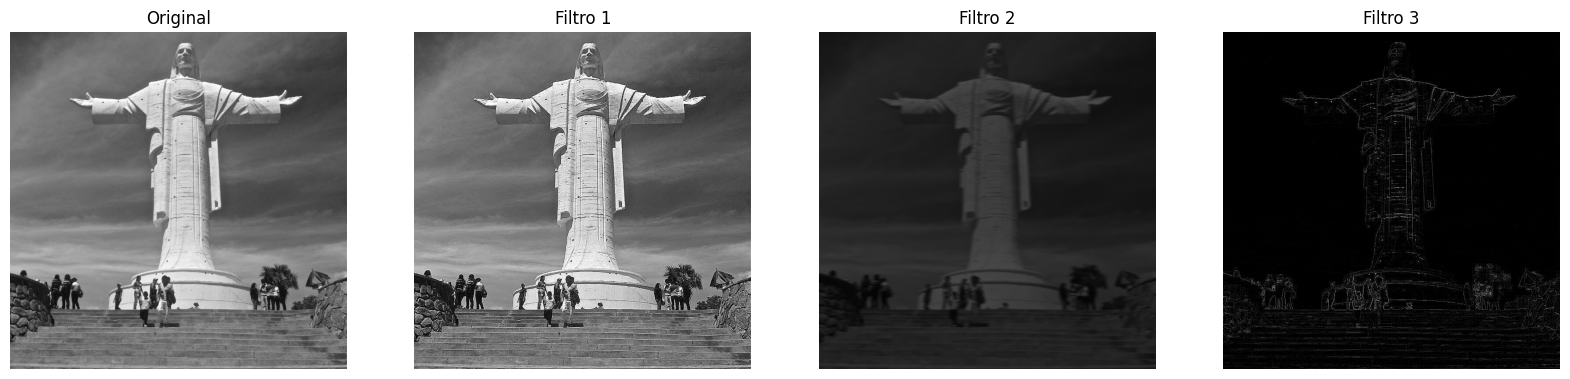

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread(r"cristo.jpg", 0)
mascara  = np.array([[ 0, -1,  0], [-1, 5, -1], [0, -1, 0]])
mascara2 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]) / 100
mascara3 = np.array([[0, 1, 0], [ 1, -4,  1], [0, 1, 0]])

imgFiltro1 = cv2.filter2D(img, -1, mascara)
imgFiltro2 = cv2.filter2D(img, -1, mascara2)
imgFiltro3 = cv2.filter2D(img, -1, mascara3)

plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.title('Original')
plt.imshow(img ,cmap='gray')
plt.axis('off')

plt.subplot(142)
plt.title('Filtro 1')
plt.imshow(imgFiltro1 ,cmap='gray')
plt.axis('off')

plt.subplot(143)
plt.title('Filtro 2')
plt.imshow(cv2.cvtColor(imgFiltro2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(144)
plt.title('Filtro 3')
plt.imshow(imgFiltro3 ,cmap='gray')
plt.axis('off')

plt.show()

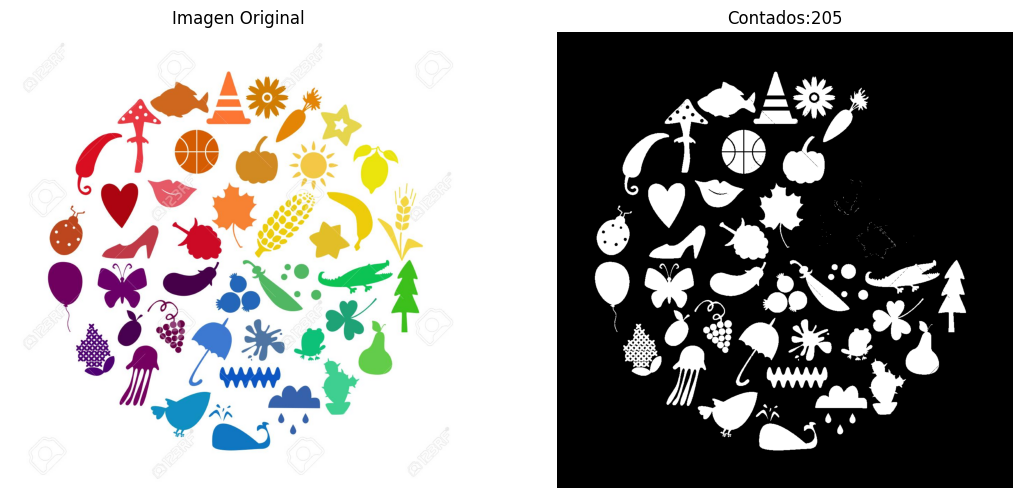

In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure as ms


def contar (img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _,binaria = cv2.threshold(img_gris, 127, 255, cv2.THRESH_MASK + 2)
    etiquetar = ms.label(binaria, connectivity=2)
    cont=np.max(etiquetar)
    return cont, binaria, etiquetar

imagen = cv2.imread('elementos.jpg')

cont, img_bin, etiquetado = contar(imagen)

plt.figure(figsize=(20, 8))
plt.subplot(131)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(img_bin, cv2.COLOR_BGR2RGB))
plt.title(f'Contados:{cont}')
plt.axis('off')
plt.show()



In [5]:
import math

def Cadena_A_Lista(materiales_electricos):

    lineas = materiales_electricos.split('\n')
    

    lista = []
    

    for linea in lineas:

        for separador in ['/', '-', '*', '|']:
            if separador in linea:
                nombre, precio = linea.split(separador)
                lista.append(nombre.strip())
                lista.append(float(precio.strip()))
                break
    
    return lista

def calcular_media_geometrica(lista):

    precios = [lista[i] for i in range(1, len(lista), 2)]

    producto = math.prod(precios)

    media_geometrica = producto ** (1 / len(precios))
    return media_geometrica

def filtrar_por_MediaGeometrica(lista):
    media_geometrica = calcular_media_geometrica(lista)

    lista_filtrada = [(lista[i-1], lista[i]) for i in range(1, len(lista), 2) if lista[i] > media_geometrica]
    return lista_filtrada, media_geometrica


Materiales_electricos = '''Cable eléctrico/50.99
Interruptor/10.49
Enchufe-15.25
Fusible/5.75
Disyuntor*75.30
Transformador*20.50
Resistencia*82.15
Condensador*3.60
Diodo/1.10
Transistor/4.45
Relé-20.50
Protector de sobretensión*30.55
Regulador de voltaje*40.80
Medidor de energía*200.65
Generador*85.99
Motor eléctrico*250.35
Batería/150.70
Inversor/300.40
Conector-5.15
Terminal*3.85
Caja de conexiones*25.55
Cinta aislante*8.30
Tubo Conduit*20.75
Canaleta*15.20
Caja de fusibles|50.65
Panel de control|400.99
Interruptor de circuito-60.35
Lámpara-20.70
Bombilla/10.40
Sierra para metales|100.70'''


lista = Cadena_A_Lista(Materiales_electricos)


lista_filtrada, media_geometrica = filtrar_por_MediaGeometrica(lista)


print(f"Media geométrica de los precios de los materiales eléctricos: {media_geometrica}")


print("\nMateriales cuyos precios exceden la media geométrica:")
for i, (material, precio) in enumerate(lista_filtrada, 1):
    print(f"{i}: ({material}, {precio})")


print(f"\nCantidad de materiales cuyos precios exceden la media geométrica: {len(lista_filtrada)}")


Media geométrica de los precios de los materiales eléctricos: 27.682384685830012

Materiales cuyos precios exceden la media geométrica:
1: (Cable eléctrico, 50.99)
2: (Disyuntor, 75.3)
3: (Resistencia, 82.15)
4: (Protector de sobretensión, 30.55)
5: (Regulador de voltaje, 40.8)
6: (Medidor de energía, 200.65)
7: (Generador, 85.99)
8: (Motor eléctrico, 250.35)
9: (Batería, 150.7)
10: (Inversor, 300.4)
11: (Caja de fusibles, 50.65)
12: (Panel de control, 400.99)
13: (Interruptor de circuito, 60.35)
14: (Sierra para metales, 100.7)

Cantidad de materiales cuyos precios exceden la media geométrica: 14


In [7]:
def Cadena_A_Lista(materiales_electricos):

    lineas = materiales_electricos.split('\n')
    

    lista = []
    

    for linea in lineas:

        idx = len(linea)
        for separador in ['/', '-', '*', '|']:
            if separador in linea:
                idx_temp = linea.find(separador)
                if idx_temp < idx:
                    idx = idx_temp
        if idx != len(linea):
            nombre = linea[:idx].strip()
            precio = float(linea[idx+1:].strip())
            lista.append(nombre)
            lista.append(precio)
    
    return lista

Materiales_electricos = '''Cable eléctrico/50.99
Interruptor/10.49
Enchufe-15.25
Fusible/5.75
Disyuntor*75.30
Transformador*20.50
Resistencia*82.15
Condensador*3.60
Diodo/1.10
Transistor/4.45
Relé-20.50
Protector de sobretensión*30.55
Regulador de voltaje*40.80
Medidor de energía*200.65
Generador*85.99
Motor eléctrico*250.35
Batería/150.70
Inversor/300.40
Conector-5.15
Terminal*3.85
Caja de conexiones*25.55
Cinta aislante*8.30
Tubo Conduit*20.75
Canaleta*15.20
Caja de fusibles|50.65
Panel de control|400.99
Interruptor de circuito-60.35
Lámpara-20.70
Bombilla/10.40
Sierra para metales|100.70'''

lista = Cadena_A_Lista(Materiales_electricos)

print("Formato original:")
print(lista)

print("\nFormato enumerado:")
for i, elemento in enumerate(lista, 1):
    print(f"{i}: {elemento}")


Formato original:
['Cable eléctrico', 50.99, 'Interruptor', 10.49, 'Enchufe', 15.25, 'Fusible', 5.75, 'Disyuntor', 75.3, 'Transformador', 20.5, 'Resistencia', 82.15, 'Condensador', 3.6, 'Diodo', 1.1, 'Transistor', 4.45, 'Relé', 20.5, 'Protector de sobretensión', 30.55, 'Regulador de voltaje', 40.8, 'Medidor de energía', 200.65, 'Generador', 85.99, 'Motor eléctrico', 250.35, 'Batería', 150.7, 'Inversor', 300.4, 'Conector', 5.15, 'Terminal', 3.85, 'Caja de conexiones', 25.55, 'Cinta aislante', 8.3, 'Tubo Conduit', 20.75, 'Canaleta', 15.2, 'Caja de fusibles', 50.65, 'Panel de control', 400.99, 'Interruptor de circuito', 60.35, 'Lámpara', 20.7, 'Bombilla', 10.4, 'Sierra para metales', 100.7]

Formato enumerado:
1: Cable eléctrico
2: 50.99
3: Interruptor
4: 10.49
5: Enchufe
6: 15.25
7: Fusible
8: 5.75
9: Disyuntor
10: 75.3
11: Transformador
12: 20.5
13: Resistencia
14: 82.15
15: Condensador
16: 3.6
17: Diodo
18: 1.1
19: Transistor
20: 4.45
21: Relé
22: 20.5
23: Protector de sobretensión
24: